In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

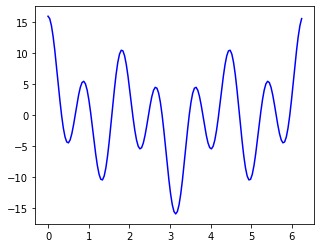

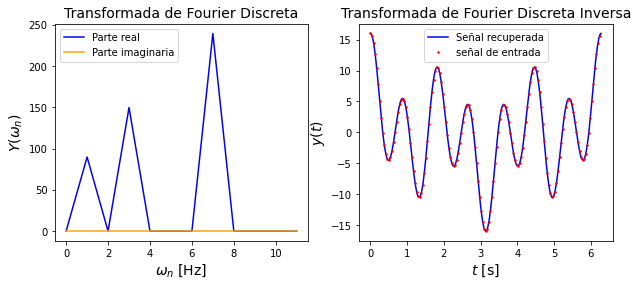

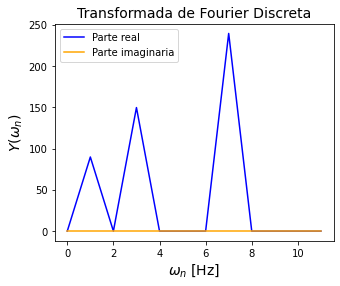

In [40]:
T=2*np.pi
N=150

#Data
h=T/N #length of intervals
def yfun(t):
    yt = 3*np.cos(t)+5*np.cos(3*t)+8*np.cos(7*t)
    #yt=100*np.cos(t)
    return yt
tk=np.array([k*h for k in range(0,N)])
yk=np.array([yfun(k*h) for k in range(0,N)])
plt.figure(figsize=(5,4))
plt.plot(tk,yk,'-b',label='data')
#plt.savefig('Inputsignal.png',dpi=300)

#DFT
s=1/h #sampling rate
def Yfun(n):
    h=T/N
    suma=0
    for k in range(1,N+1):
        yk=yfun(k*h)
        suma+=yk*np.e**((-2*np.pi*1j*k*n)/N)/np.sqrt(2*np.pi)
    return suma
Yn=np.array([Yfun(n) for n in range(0,int(np.ceil(s/2)))])
w1=2*np.pi/T
wn=np.array([n*w1 for n in range(0,int(np.ceil(s/2)))])

#IDFT
def yrfun(t):
    suma=0
    for n in range(1,int(np.ceil(s/2))):
        wn=n*w1
        suma+=2*np.pi/T*np.e**(1j*wn*t)/np.sqrt(2*np.pi)*Yfun(n)*h*2
    return suma
tt=np.linspace(0,T,400)
yy=np.array([yrfun(tm) for tm in tt])

#Plot
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(wn,Yn.real,'-b',label='Parte real')
plt.plot(wn,Yn.imag,'-',color='orange',label='Parte imaginaria')
plt.legend()
plt.title('Transformada de Fourier Discreta',fontsize=14)
plt.ylabel('$Y(\omega_n)$',fontsize=14)
plt.xlabel('$\omega_n$ [Hz]',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(122)
plt.plot(tt,yy.real,'-b',label='Señal recuperada')
plt.plot(tk,yk,'or',markersize=1.5,label='señal de entrada')
plt.title('Transformada de Fourier Discreta Inversa',fontsize=14)
plt.ylabel('$y(t)$',fontsize=14)
plt.xlabel('$t$ [s]',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
#plt.savefig('dft_idft.png',dpi=300)
plt.show()

plt.figure(figsize=(5,5))
plt.plot(wn,Yn.real,'-b',label='Transformada Discreta')
plt.plot()
plt.legend()
plt.title('Transformada de Fourier Discreta vs Analítica',fontsize=14)
plt.ylabel('$Y(\omega_n)$',fontsize=14)
plt.xlabel('$\omega_n$ [Hz]',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [41]:
-2*s

-47.74648292756861

In [ ]:
#Señal pura
def yfun(t):
    yt = 3*np.cos(t)+5*np.cos(3*t)+8*np.cos(7*t)
    return yt

#Señal con ruido
def yfun(t):
    np.random.seed(int(t/h))
    yt = 3*np.cos(t)+5*np.cos(3*t)+8*np.cos(7*t)+(np.random.rand()-0.5)*2
    return yt